**Product Recommendation System**

In [ ]:
import pandas as pd
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
url = '/content/drive/MyDrive/Research paper/project data(research).csv'
review = pd.read_csv(url)
review.head(10)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42
5,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This amazon fire 8 inch tablet is the perfect ...,Just what we expected,NaN,NaN,tklit
6,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,"Great for e-reading on the go, nice and light ...",great e-reader tablet,NaN,NaN,Droi
7,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,"I gave this as a Christmas gift to my inlaws, ...",Great for gifts,NaN,NaN,Kacy
8,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Elect

In [ ]:
review.shape

(34660, 21)

**Exploratory Data Analysis**

In [ ]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [ ]:
review.drop(['id','reviews.date','asins','reviews.didPurchase',
             'reviews.id','reviews.userCity','reviews.userProvince',
             'reviews.username','reviews.sourceURLs','keys',
             'reviews.dateSeen','reviews.dateAdded'],axis=1,inplace=True)

In [ ]:
review.shape

(34660, 9)

In [ ]:
review.columns

Index(['name', 'brand', 'categories', 'manufacturer', 'reviews.doRecommend',
       'reviews.numHelpful', 'reviews.rating', 'reviews.text',
       'reviews.title'],
      dtype='object')

In [ ]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 27900 non-null  object 
 1   brand                34660 non-null  object 
 2   categories           34660 non-null  object 
 3   manufacturer         34660 non-null  object 
 4   reviews.doRecommend  34066 non-null  object 
 5   reviews.numHelpful   34131 non-null  float64
 6   reviews.rating       34627 non-null  float64
 7   reviews.text         34659 non-null  object 
 8   reviews.title        34655 non-null  object 
dtypes: float64(2), object(7)
memory usage: 2.4+ MB


In [ ]:
review.isnull().sum()

name                   6760
brand                     0
categories                0
manufacturer              0
reviews.doRecommend     594
reviews.numHelpful      529
reviews.rating           33
reviews.text              1
reviews.title             5
dtype: int64

In [ ]:
review.rename(columns={"reviews.date": "review_date", 
                       "reviews.doRecommend": "is_product_recomended",
                       "reviews.numHelpful": "reviews_numHelpful",
                       "reviews.rating":"rating",
                       "reviews.text":"reviews",
                       "reviews.tittle":"title"},inplace=True)

In [ ]:
review.rename(columns={"reviews.rating":"rating"},inplace=True)

In [ ]:
review.isnull().sum()

name                     6760
brand                       0
categories                  0
manufacturer                0
is_product_recomended     594
reviews_numHelpful        529
rating                     33
reviews                     1
reviews.title               5
dtype: int64

In [ ]:
review.describe()

,reviews_numHelpful,rating
count,34131.000000,34627.000000
mean,0.630248,4.584573
std,13.215775,0.735653
min,0.000000,1.000000
25%,0.000000,4.000000
50%,0.000000,5.000000
75%,0.000000,5.000000
max,814.000000,5.000000


In [ ]:
review.describe(exclude='number')

,name,brand,categories,manufacturer,is_product_recomended,reviews,reviews.title
count,27900,34660,34660,34660,34066,34659,34655
unique,48,6,41,2,2,34659,19767
top,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",Amazon,True,Great value for a tablet. Was a gift for dad i...,Great product
freq,10966,28701,10966,34639,32682,1,645


**Data Preprocessing**

In [ ]:
review['reviews_numHelpful'] = review['reviews_numHelpful'].fillna(review['reviews_numHelpful'].mode()[0.0])

In [ ]:
review.dropna(inplace=True)

In [ ]:
review.isnull().sum()

name                     0
brand                    0
categories               0
manufacturer             0
is_product_recomended    0
reviews_numHelpful       0
rating                   0
reviews                  0
reviews.title            0
dtype: int64

In [ ]:
review.shape

(27407, 9)

In [ ]:
temp=review

In [ ]:
#Label Encoding for Brand, categories, manufacturer and is_product_recomended
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

review['name'] = label_encoder.fit_transform(review['name'])
review['is_product_recomended'] = label_encoder.fit_transform(review['is_product_recomended'])
review['brand'] = label_encoder.fit_transform(review['brand'])
review['categories'] = label_encoder.fit_transform(review['categories'])
review['manufacturer'] = label_encoder.fit_transform(review['manufacturer'])



In [ ]:
review['name'].nunique()

44

In [ ]:
df_min_max_scaled = review.copy()
df_notneeded = pd.DataFrame(review,columns=['reviews','reviews.title','is_product_recomended','brand','manufacturer'])
df_min_max_scaled.drop(['reviews','reviews.title','is_product_recomended','brand','manufacturer'],axis=1,inplace=True)
display(df_min_max_scaled.head())
display(df_notneeded.head())

,name,categories,reviews_numHelpful,rating
0,0,7,0.0,5.0
1,0,7,0.0,5.0
2,0,7,0.0,5.0
3,0,7,0.0,4.0
4,0,7,0.0,5.0


,reviews,reviews.title,is_product_recomended,brand,manufacturer
0,This product so far has not disappointed. My c...,Kindle,1,0,0
1,great for beginner or experienced person. Boug...,very fast,1,0,0
2,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,1,0,0
3,I've had my Fire HD 8 two weeks now and I love...,Good!!!,1,0,0
4,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,1,0,0


In [ ]:
#MIN-MAX scaling
for column in df_min_max_scaled.columns:
  df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    

In [ ]:
df_min_max_scaled.head()

,name,categories,reviews_numHelpful,rating
0,0.0,0.411765,0.0,1.00
1,0.0,0.411765,0.0,1.00
2,0.0,0.411765,0.0,1.00
3,0.0,0.411765,0.0,0.75
4,0.0,0.411765,0.0,1.00


In [ ]:
df_min_max_scaled['name'].value_counts()

0.813953    10962
0.674419     3299
0.418605     3176
0.000000     2814
0.325581     2526
0.767442     1679
0.488372     1030
0.953488      580
0.790698      334
0.046512      318
0.023256      146
0.279070      135
0.209302      128
0.883721       67
0.162791       36
0.906977       30
0.093023       25
0.139535       19
0.744186       14
0.930233        9
0.837209        9
0.186047        8
0.720930        6
0.255814        6
0.302326        6
0.860465        6
1.000000        6
0.069767        5
0.372093        4
0.581395        4
0.651163        3
0.441860        3
0.511628        3
0.465116        1
0.604651        1
0.232558        1
0.348837        1
0.116279        1
0.627907        1
0.558140        1
0.976744        1
0.395349        1
0.534884        1
0.697674        1
Name: name, dtype: int64

In [ ]:
review.sample(10)

,name,brand,categories,manufacturer,is_product_recomended,reviews_numHelpful,rating,reviews,reviews.title
21243,34,0,4,0,1,1.0,5.0,"I love it for my kids, they r enjoying playing...",Great device for kids
16798,33,0,13,0,1,0.0,4.0,Has all the functionality a child needs with e...,Great tablet for the kiddo
4197,35,0,10,0,1,0.0,4.0,"Just needs more memory, but we can handle that...",Great for my kids!
11378,35,0,10,0,1,0.0,5.0,"Awsome tablet for the price, baught 4 of them ...",Great tablet 4 price.
15304,21,0,2,0,1,0.0,4.0,I bought this for my daughter. I like it all i...,Great for the price
2413,0,0,7,0,1,0.0,4.0,This device completely meets my needs for read...,Great piece at a great price
16797,33,0,13,0,1,0.0,4.0,Ok I purchased this tablet specifically for my...,Good tablet for kids.
9808,35,0,10,0,1,1.0,5.0,This tablet is a great value for the price poi...,Good basic tablet
16865,33,0,13,0,1,0.0,4.0,The fire kid edition 7 is good but not great. ...,It's does it job!
2401,0,0,7,0,1,0.0,5.0,This is an awesome tablet. it is fast with gre...,Fast and reliable


In [ ]:
t1=review
review=temp
review=t1

**Data Visualisation**

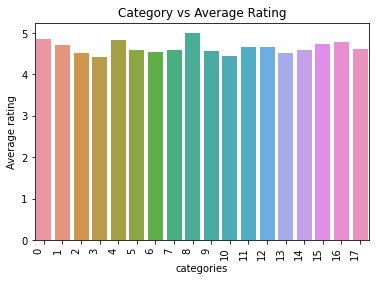

In [ ]:
df1 = review.groupby('categories')['rating'].mean().to_frame().reset_index()
sns.barplot(x='categories',y='rating',data=df1)
plt.title('Category vs Average Rating')
plt.xlabel('categories')
plt.xticks(rotation=90, ha='right')
plt.ylabel('Average rating')
plt.show()

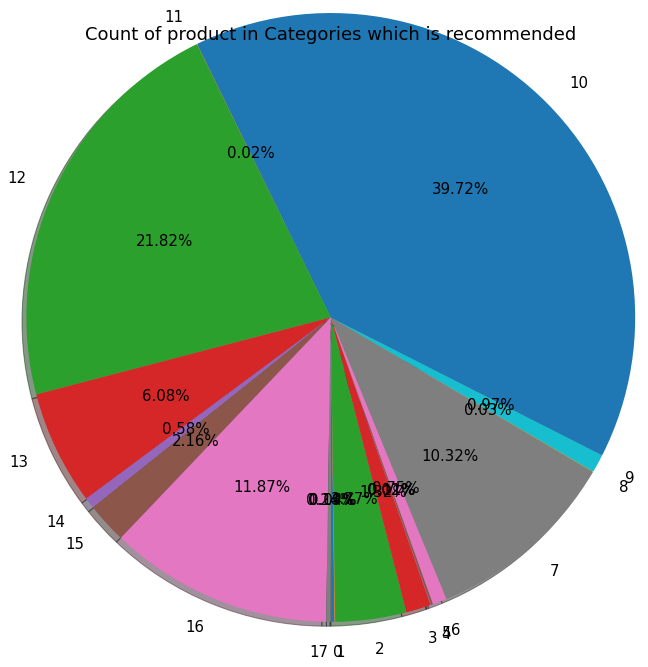

In [ ]:
df2=review[review['is_product_recomended']==1]

df2 = df2.groupby('categories')['is_product_recomended'].sum().to_frame().reset_index()
plt.figure(figsize = (10,10))

plt.rcParams.update({'font.size': 15})
textprops = {"fontsize":15}
#plt.pie(df2['is_product_recomended'], labels = df2.categories) 
plt.pie(df2['is_product_recomended'], labels = df2.categories,autopct = "%0.2f%%", # Show data in persentage for with 2 decimal point
        shadow = True, # Showing shadow of pie chart
        radius = 1.4, # Radius to increase or decrease the size of pie chart 
       startangle = 270, # Start angle of first section
        textprops =textprops) 

plt.title('Count of product in Categories which is recommended') 

plt.show()


<Figure size 3960x3816 with 0 Axes>

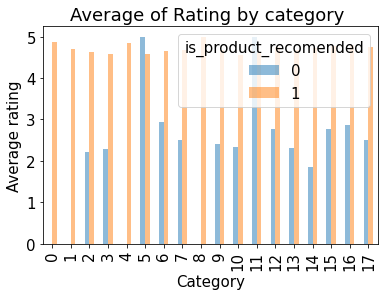

In [ ]:
df=review
df_pivot = pd.pivot_table(df, values="rating",index="categories",columns="is_product_recomended", aggfunc=np.mean) 
plt.figure(figsize=(55,53))
ax = df_pivot.plot(kind="bar",alpha=0.5) 
plt.rcParams["figure.figsize"] = (15,25)
plt.title('Average of Rating by category ') 
plt.xlabel('Category') 
plt.ylabel('Average rating') 


plt.show() 

In [ ]:
df4 = df.groupby('categories')['is_product_recomended'].count().to_frame()
df4=df4[df4['is_product_recomended']>0].reset_index()
df4

,categories,is_product_recomended
0,0,51
1,1,10
2,2,1038
3,3,372
4,4,6
5,5,30
6,6,212
7,7,2814
8,8,7
9,9,269


In [ ]:
df44=df[df['is_product_recomended']==1]
df44 = df44.groupby('categories')['is_product_recomended'].count().to_frame().reset_index()

df44

,categories,is_product_recomended
0,0,51
1,1,10
2,2,989
3,3,347
4,4,6
5,5,29
6,6,198
7,7,2710
8,8,7
9,9,254


In [ ]:
df55=df[df['is_product_recomended']==False]
df55 = df55.groupby('categories')['is_product_recomended'].count().to_frame().reset_index()
df55
df55

,categories,is_product_recomended
0,2,49
1,3,25
2,5,1
3,6,14
4,7,104
5,9,15
6,10,538
7,11,1
8,12,218
9,13,103


In [ ]:
df44['is_product_recomended']=(df44['is_product_recomended']/df4['is_product_recomended'])*100;
df44.reset_index()
df44

,categories,is_product_recomended
0,0,100.000000
1,1,100.000000
2,2,95.279383
3,3,93.279570
4,4,100.000000
5,5,96.666667
6,6,93.396226
7,7,96.304193
8,8,100.000000
9,9,94.423792


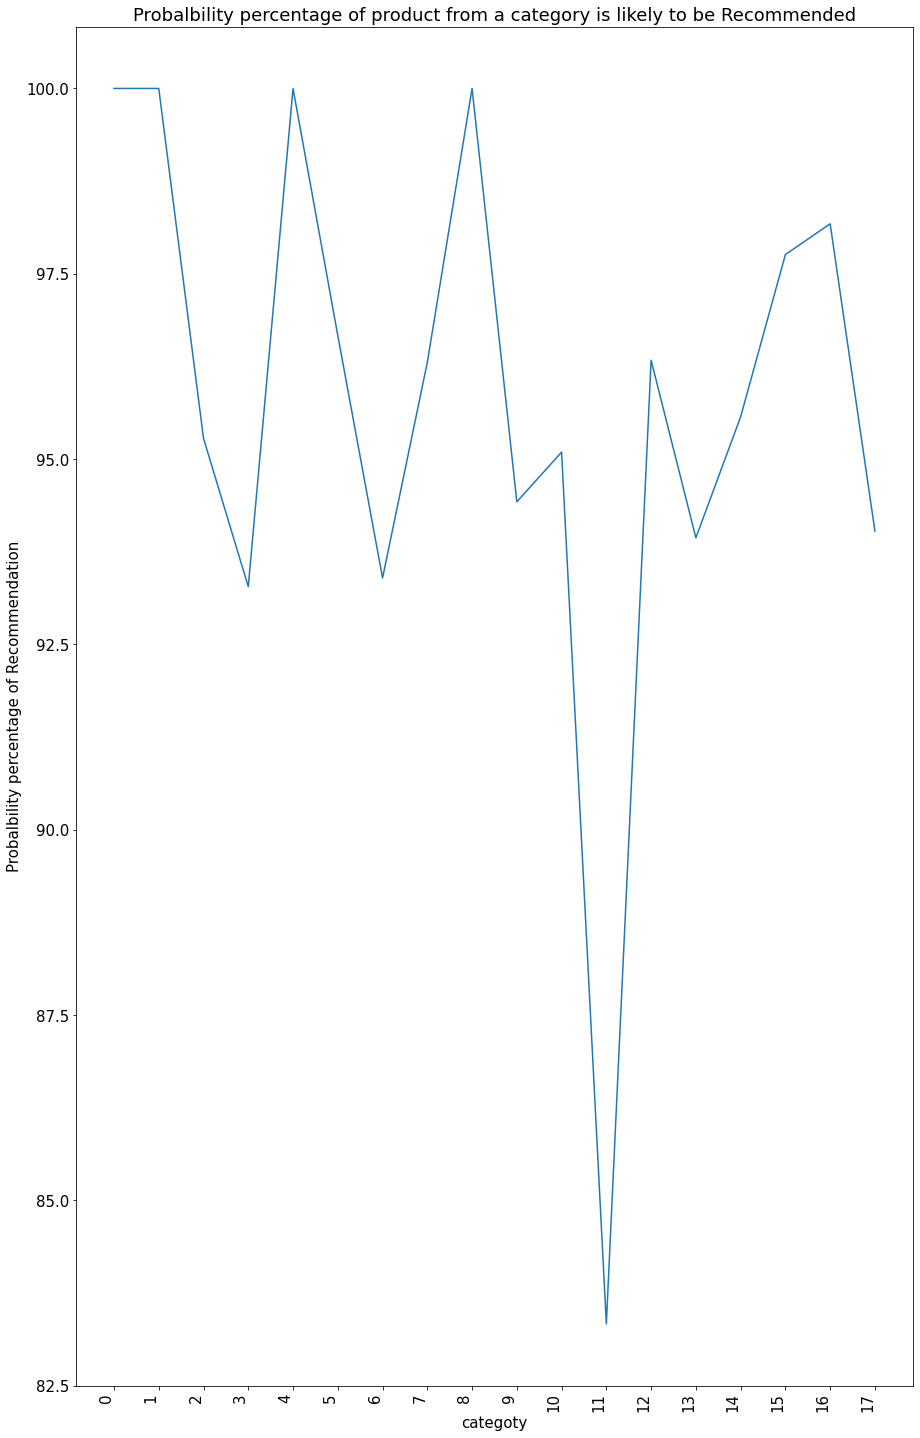

In [ ]:

plt.plot(df44['categories'],df44['is_product_recomended'])
plt.rcParams["figure.figsize"] = (10,5)
plt.title('Probalbility percentage of product from a category is likely to be Recommended')
plt.xlabel('categoty')
values = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17'] 
plt.xticks(df44['categories'],values)
plt.xticks(rotation=90, ha='right')
plt.ylabel('Probalbility percentage of Recommendation')
plt.show()

In [ ]:
df54 = df.groupby('rating')['is_product_recomended'].count().to_frame()
df54=df54[df54['is_product_recomended']>0].reset_index()
df54

,rating,is_product_recomended
0,1.0,296
1,2.0,326
2,3.0,1265
3,4.0,7160
4,5.0,18360


In [ ]:
df544=df[df['is_product_recomended']==1]
df544 = df544.groupby('rating')['is_product_recomended'].count().to_frame().reset_index()

df544

,rating,is_product_recomended
0,1.0,22
1,2.0,48
2,3.0,822
3,4.0,7053
4,5.0,18312


In [ ]:
df544['is_product_recomended']=(df544['is_product_recomended']/df54['is_product_recomended'])*100;
df544.reset_index()
df544

,rating,is_product_recomended
0,1.0,7.432432
1,2.0,14.723926
2,3.0,64.980237
3,4.0,98.505587
4,5.0,99.738562


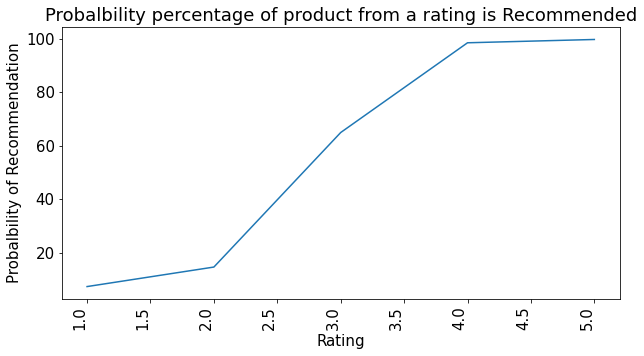

In [ ]:
plt.plot(df544['rating'],df544['is_product_recomended'])
plt.rcParams["figure.figsize"] = (6,8)
plt.title('Probalbility percentage of product from a rating is Recommended')
plt.xlabel('Rating')
plt.xticks(rotation=90, ha='right')
plt.ylabel('Probalbility of Recommendation')
plt.show()

In [ ]:
dfx4=df
dfx4 = df.groupby('categories')['rating'].count().to_frame().reset_index()
dfx4

,categories,rating
0,0,51
1,1,10
2,2,1038
3,3,372
4,4,6
5,5,30
6,6,212
7,7,2814
8,8,7
9,9,269


In [ ]:
df3=df[df['rating']==5.0]
df3 = df3.groupby('categories')['rating'].count().to_frame().reset_index()
df3

,categories,rating
0,0,44
1,1,7
2,2,659
3,3,220
4,4,5
5,5,19
6,6,135
7,7,1878
8,8,7
9,9,178


In [ ]:
df3=df[df['rating']==5.0]
df3 = df3.groupby('categories')['rating'].count().to_frame().reset_index()
df3['rating']=(df3['rating']/dfx4['rating'])*100;
df3

,categories,rating
0,0,86.274510
1,1,70.000000
2,2,63.487476
3,3,59.139785
4,4,83.333333
5,5,63.333333
6,6,63.679245
7,7,66.737740
8,8,100.000000
9,9,66.171004


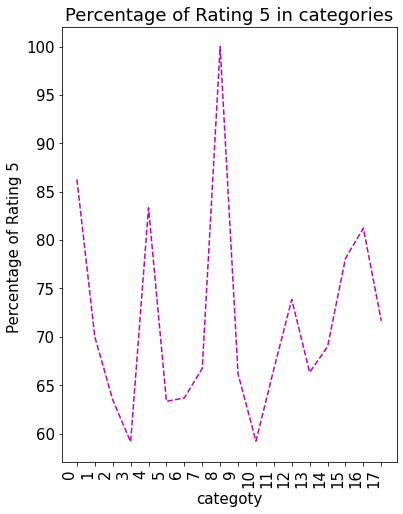

In [ ]:
 
  
plt.plot(df3.categories,df3['rating'],'m--')
plt.rcParams["figure.figsize"] = (13,5)
plt.title('Percentage of Rating 5 in categories')
plt.xlabel('categoty')
values = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17'] 
plt.xticks(df3['categories'],values)
plt.xticks(rotation=90, ha='right')
plt.ylabel('Percentage of Rating 5 ')
plt.show()

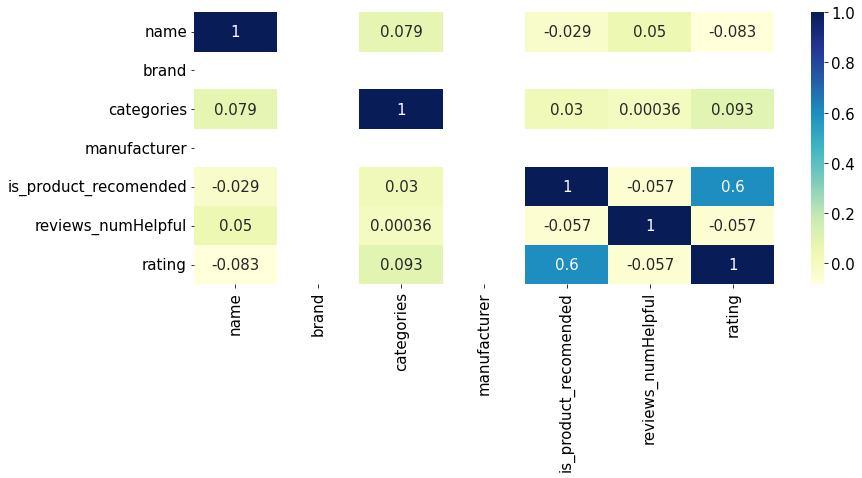

In [ ]:
import seaborn as sb
import matplotlib.pyplot as mp
dataplot = sb.heatmap(review.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
mp.show()

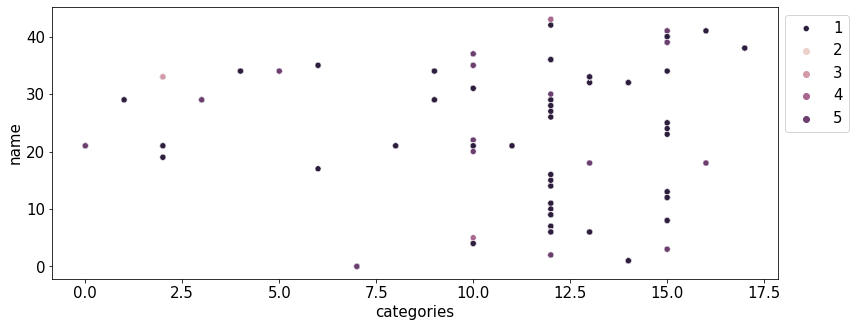

In [ ]:
sns.scatterplot(x=review['categories'],y=review['name'],hue=review['rating'],data=review)
plt.legend(["1" , "2","3","4","5"], bbox_to_anchor = (1 , 1))
plt.show()

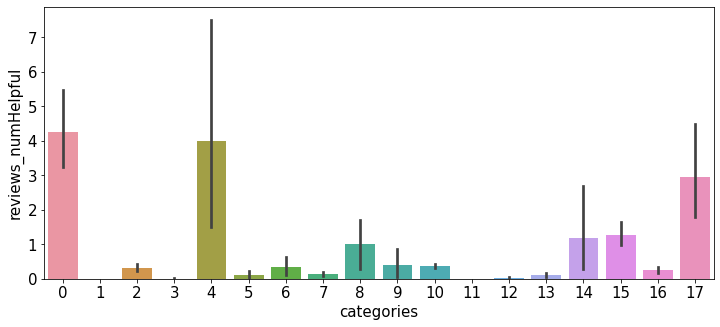

In [ ]:
plt.figure(figsize = (12,5))
sns.barplot(x=review['categories'],y=review['reviews_numHelpful'],data= review)

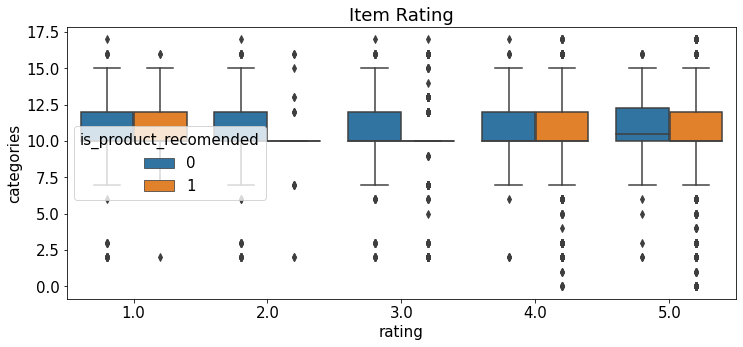

In [ ]:
plt.figure(figsize = (12,5))
ax=sns.boxplot(x=review['rating'],y=review['categories'],hue=review['is_product_recomended'],data=review)
plt.title('Item Rating')
plt.xlabel('rating')
plt.show()

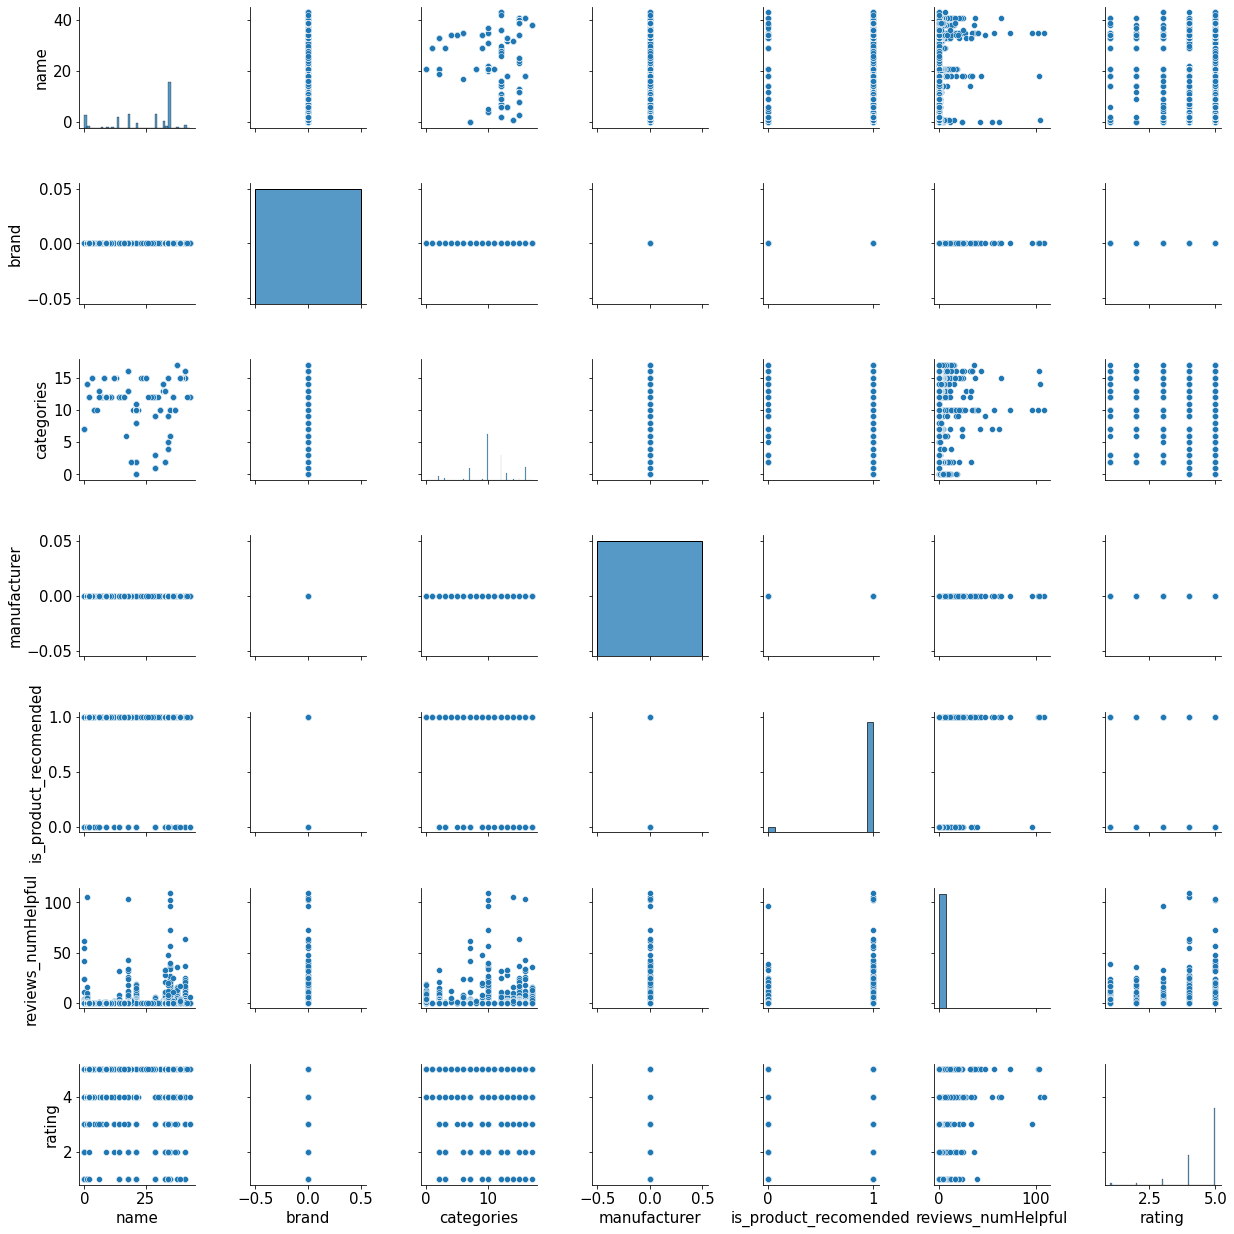

In [ ]:
sns.pairplot(data=review)
plt.show()

********************************************

**PART 2**

***********************************************************************

In [ ]:
review.head()

,name,brand,categories,manufacturer,is_product_recomended,reviews_numHelpful,rating,reviews,reviews.title
0,0,0,7,0,1,0.0,5.0,This product so far has not disappointed. My c...,Kindle
1,0,0,7,0,1,0.0,5.0,great for beginner or experienced person. Boug...,very fast
2,0,0,7,0,1,0.0,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.
3,0,0,7,0,1,0.0,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!
4,0,0,7,0,1,0.0,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids


In [ ]:
import nltk
import re
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
review['final_review'] = review['reviews']+review['reviews.title']
review = review.drop(['reviews','reviews.title'],axis=1)

In [ ]:
review.head()

,name,brand,categories,manufacturer,is_product_recomended,reviews_numHelpful,rating,final_review
0,0,0,7,0,1,0.0,5.0,This product so far has not disappointed. My c...
1,0,0,7,0,1,0.0,5.0,great for beginner or experienced person. Boug...
2,0,0,7,0,1,0.0,5.0,Inexpensive tablet for him to use and learn on...
3,0,0,7,0,1,0.0,4.0,I've had my Fire HD 8 two weeks now and I love...
4,0,0,7,0,1,0.0,5.0,I bought this for my grand daughter when she c...


In [ ]:
def senti(row):   
    if row['rating'] == 3.0:
        val = 'Neutral'
    elif row['rating'] == 1.0 or row['rating'] == 2.0:
        val = 'Negative'
    elif row['rating'] == 4.0 or row['rating'] == 5.0:
        val = 'Positive'
    else:
        val = -1
    return val

In [ ]:
review['sentiment'] = review.apply(senti, axis=1)
review.head()

,name,brand,categories,manufacturer,is_product_recomended,reviews_numHelpful,rating,final_review,sentiment
0,0,0,7,0,1,0.0,5.0,This product so far has not disappointed. My c...,Positive
1,0,0,7,0,1,0.0,5.0,great for beginner or experienced person. Boug...,Positive
2,0,0,7,0,1,0.0,5.0,Inexpensive tablet for him to use and learn on...,Positive
3,0,0,7,0,1,0.0,4.0,I've had my Fire HD 8 two weeks now and I love...,Positive
4,0,0,7,0,1,0.0,5.0,I bought this for my grand daughter when she c...,Positive


In [ ]:
review['sentiment'].value_counts()

Positive    25520
Neutral      1265
Negative      622
Name: sentiment, dtype: int64

**Text Punctuations Cleaning**

In [ ]:
def review_cleaning(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
review['final_review']=review['final_review'].apply(lambda x:review_cleaning(x))
review.head()

,name,brand,categories,manufacturer,is_product_recomended,reviews_numHelpful,rating,final_review,sentiment
0,0,0,7,0,1,0.0,5.0,this product so far has not disappointed my ch...,Positive
1,0,0,7,0,1,0.0,5.0,great for beginner or experienced person bough...,Positive
2,0,0,7,0,1,0.0,5.0,inexpensive tablet for him to use and learn on...,Positive
3,0,0,7,0,1,0.0,4.0,ive had my fire hd two weeks now and i love i...,Positive
4,0,0,7,0,1,0.0,5.0,i bought this for my grand daughter when she c...,Positive


**Stop Words - removing words that do not affect the result**

In [ ]:
stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each', 
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above', 
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't", 
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from', 
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs', 
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all','i', 'me', 'my', 'myself', 'we', 'our', 
             'ours', 'ourselves', 'you', "you're", "you've",'daughter','son','brother','father','mother',
                    "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself',
                    'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
                    'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll",
                    'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
                    'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because',
                    'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
                    'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out',
                    'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where',
                    'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only',
                    'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'should','ain',
                     'aren', 'couldn', 'didn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'mightn', 'mustn', 'needn',
              'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn',"n't","n'"]

In [ ]:
replace_list=['ain', 'aren', 'couldn', 'didn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'mightn', 'mustn', 'needn',
              'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn',"n't","n'"]

In [ ]:
review['final_review'] = review['final_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
review.head()

,name,brand,categories,manufacturer,is_product_recomended,reviews_numHelpful,rating,final_review,sentiment
0,0,0,7,0,1,0.0,5.0,product far not disappointed children love use...,Positive
1,0,0,7,0,1,0.0,5.0,great beginner experienced person bought gift ...,Positive
2,0,0,7,0,1,0.0,5.0,inexpensive tablet use learn step nabi thrille...,Positive
3,0,0,7,0,1,0.0,4.0,ive fire hd two weeks love tablet great valuew...,Positive
4,0,0,7,0,1,0.0,5.0,bought grand comes visit set user entered age ...,Positive


**Polarity**

In [ ]:
from textblob import TextBlob
import cufflinks as cf
import matplotlib.pyplot as plt 
from scipy.stats import norm
import statistics
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline

In [ ]:
review['polarity'] = review['final_review'].map(lambda text: TextBlob(text).sentiment.polarity)
review['review_len'] = review['final_review'].astype(str).apply(len)
review['word_count'] = review['final_review'].apply(lambda x: len(str(x).split()))

In [ ]:
review.head()

,name,brand,categories,manufacturer,is_product_recomended,reviews_numHelpful,rating,final_review,sentiment,polarity,review_len,word_count
0,0,0,7,0,1,0.0,5.0,product far not disappointed children love use...,Positive,0.325000,98,14
1,0,0,7,0,1,0.0,5.0,great beginner experienced person bought gift ...,Positive,0.600000,63,9
2,0,0,7,0,1,0.0,5.0,inexpensive tablet use learn step nabi thrille...,Positive,0.350000,91,13
3,0,0,7,0,1,0.0,4.0,ive fire hd two weeks love tablet great valuew...,Positive,0.385556,355,56
4,0,0,7,0,1,0.0,5.0,bought grand comes visit set user entered age ...,Positive,0.385417,359,52


In [ ]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

(array([2.000e+00, 2.000e+01, 8.000e+01, 2.490e+02, 8.400e+02, 5.772e+03,
        8.179e+03, 7.412e+03, 2.961e+03, 1.892e+03]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

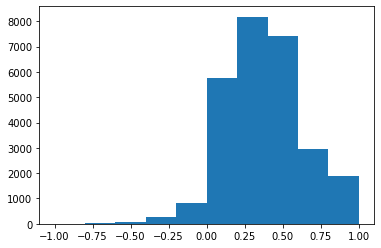

In [ ]:
plt.hist(review['polarity'])

In [ ]:
review_pos = review.loc[review['sentiment'] == 'Positive']

In [ ]:
review_neg = review.loc[review['sentiment'] == 'Negative']

In [ ]:
review_neu = review.loc[review['sentiment'] == 'Neutral']

**Positive strings**

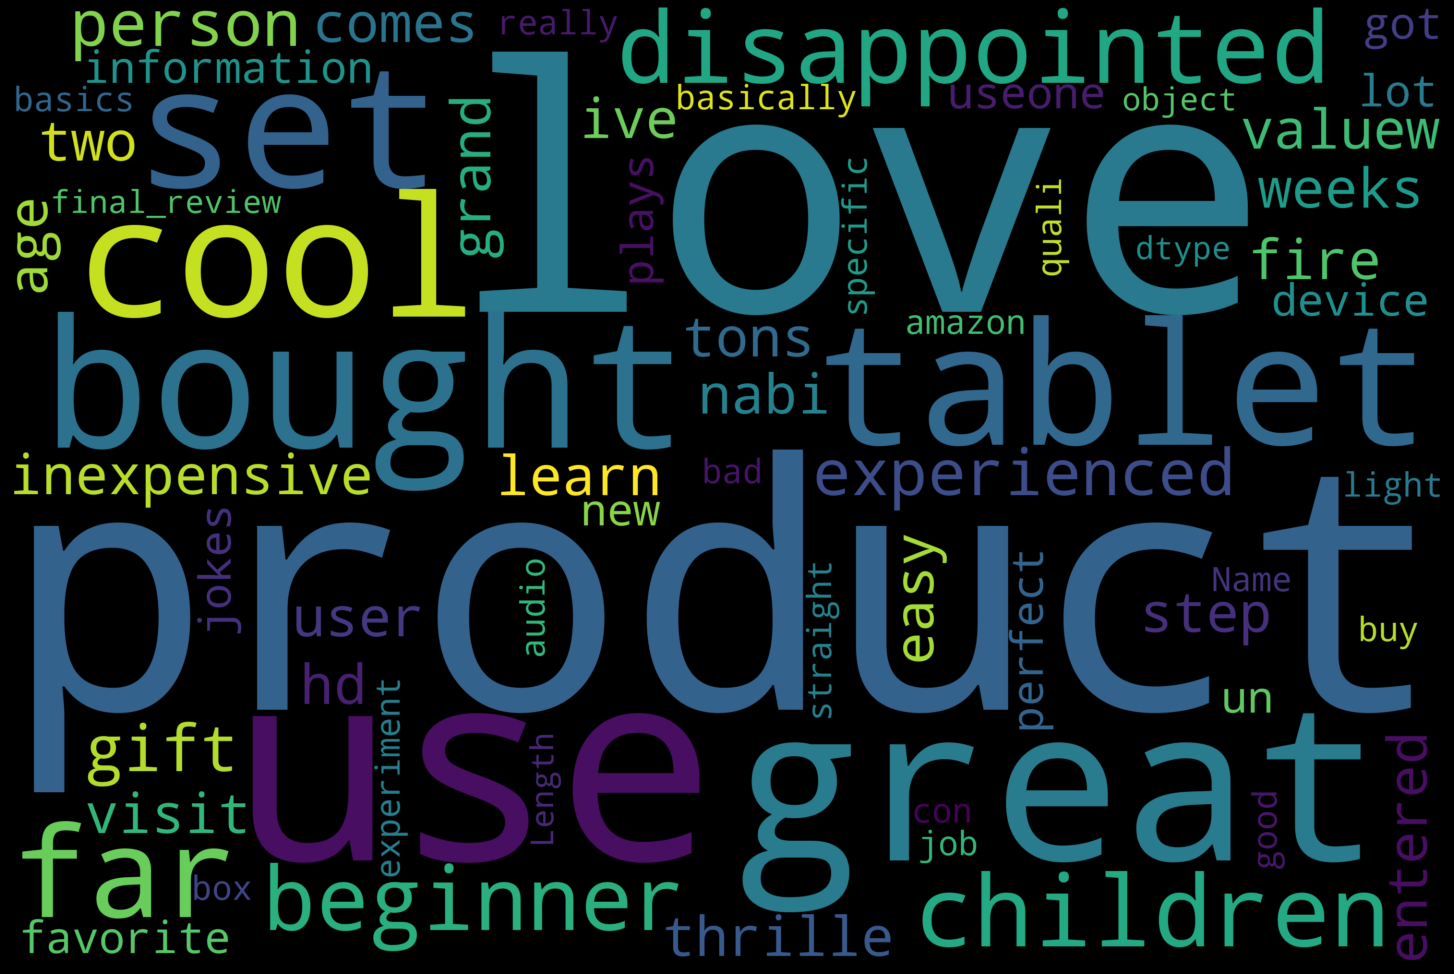

In [ ]:
text = review_pos['final_review']
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (20, 15),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Negative Strings**

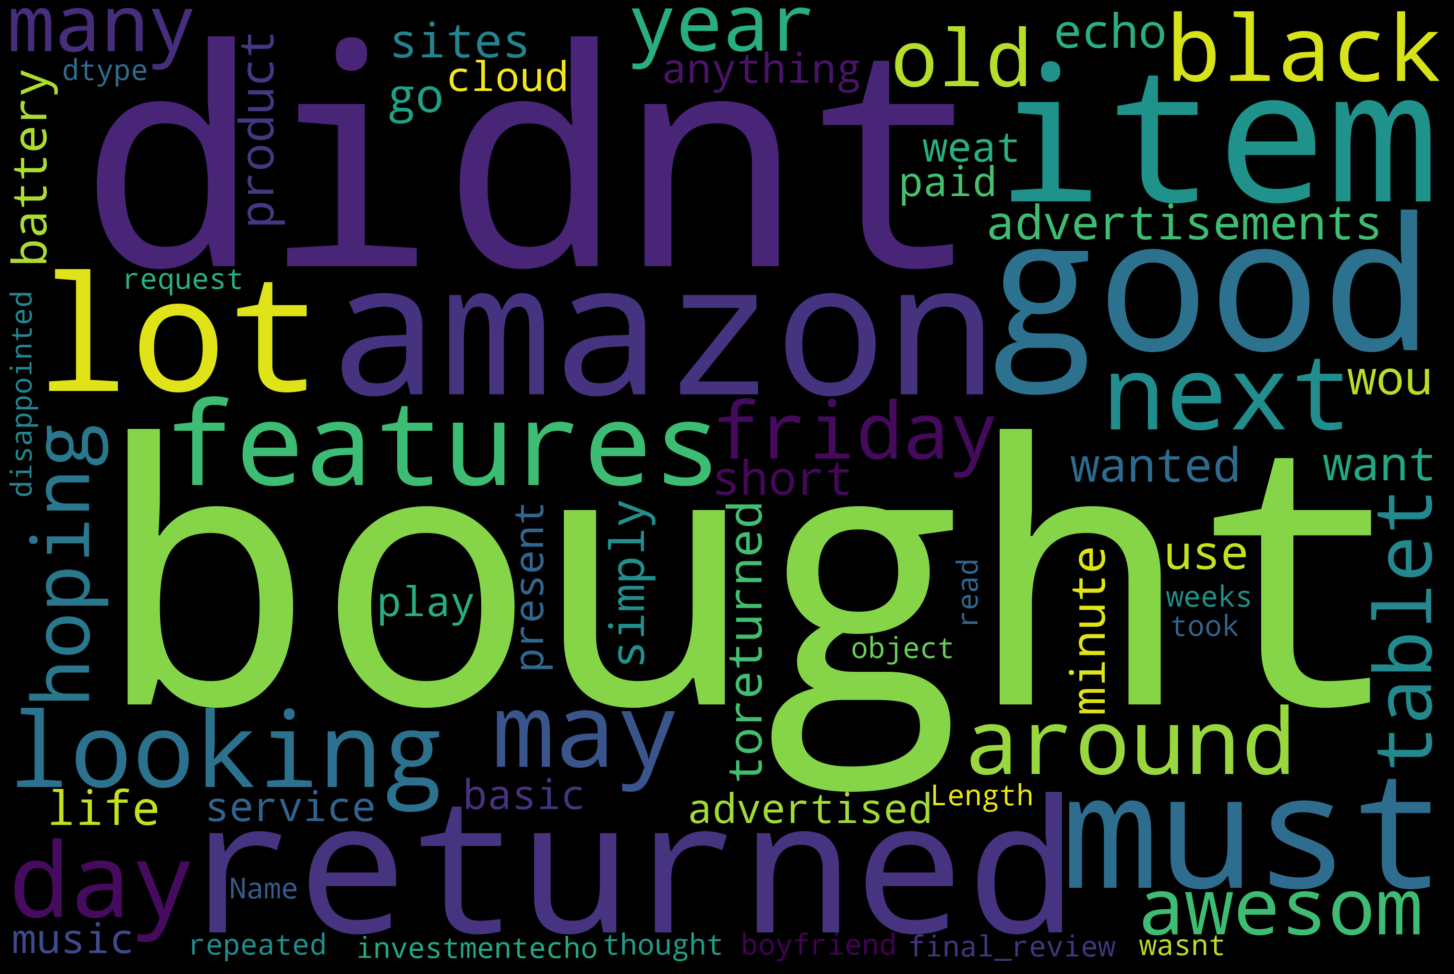

In [ ]:
text = review_neg["final_review"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (20,15),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Neutral Strings**

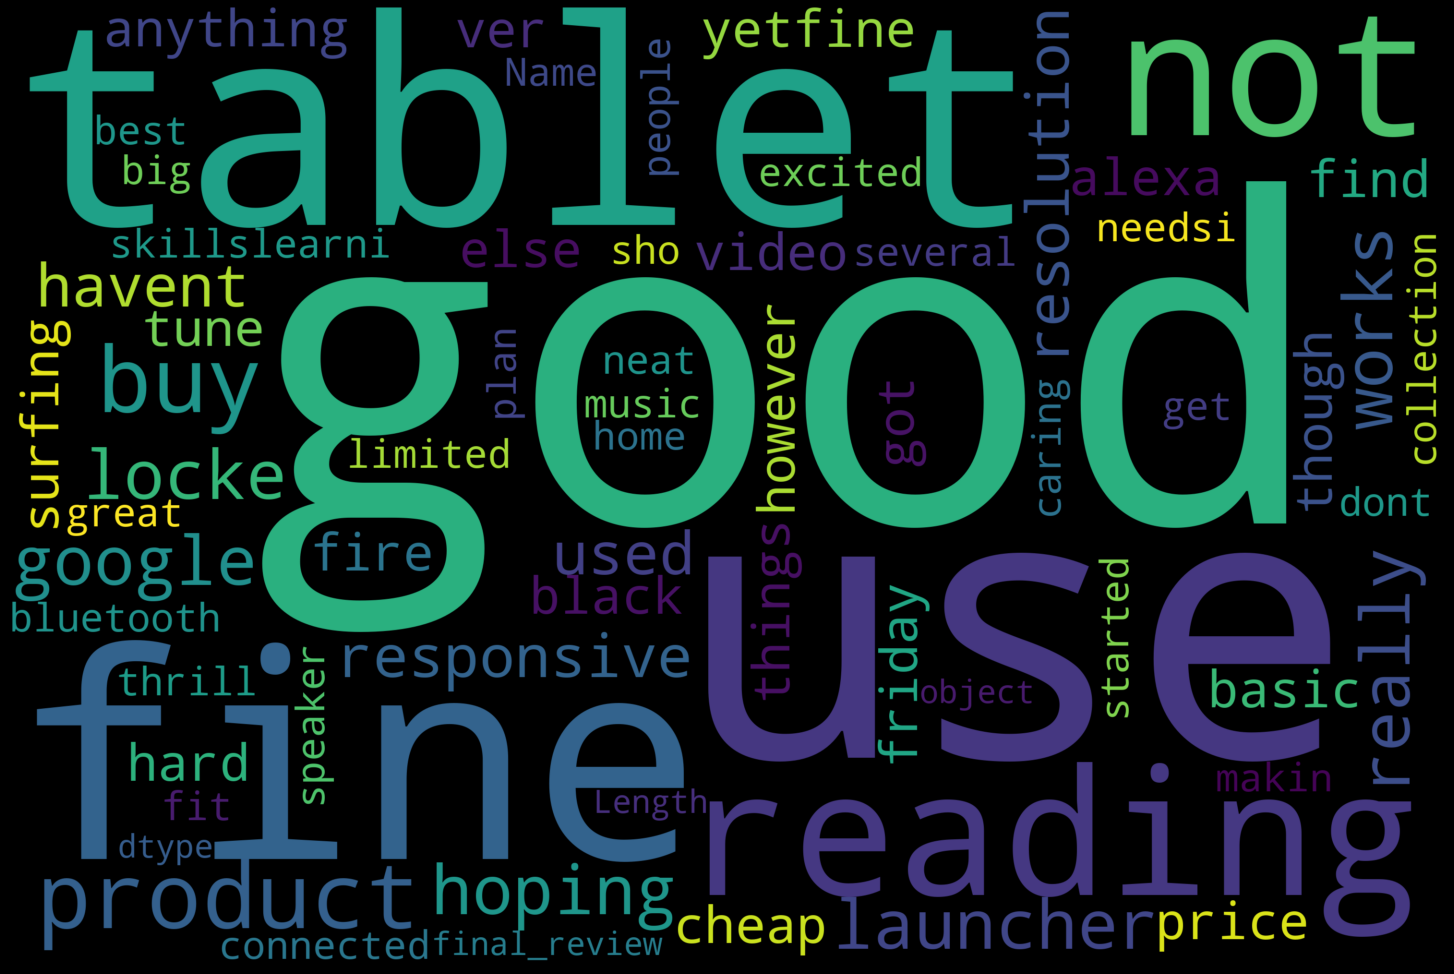

In [ ]:
text = review_neu["final_review"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = stop_words).generate(str(text))
fig = plt.figure(
    figsize = (20,15),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
review['sentiment'] = label_encoder.fit_transform(review['sentiment']) 

In [ ]:
review.head()

,name,brand,categories,manufacturer,is_product_recomended,reviews_numHelpful,rating,final_review,sentiment,polarity,review_len,word_count
0,0,0,7,0,1,0.0,5.0,product far not disappointed children love use...,2,0.325000,98,14
1,0,0,7,0,1,0.0,5.0,great beginner experienced person bought gift ...,2,0.600000,63,9
2,0,0,7,0,1,0.0,5.0,inexpensive tablet use learn step nabi thrille...,2,0.350000,91,13
3,0,0,7,0,1,0.0,4.0,ive fire hd two weeks love tablet great valuew...,2,0.385556,355,56
4,0,0,7,0,1,0.0,5.0,bought grand comes visit set user entered age ...,2,0.385417,359,52


In [ ]:
import nltk

from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('punkt')
def remove_stopwords(stmt):
    filtered_sentence = []
    words = word_tokenize(stmt)
    
    for w in words:
        if w not in stop_words:
            if w not in replace_list:
                filtered_sentence.append(w)
            else:
                filtered_sentence.append('not')
    return " ".join(filtered_sentence)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
def lemmatize(text):
    # Initialize the lemmatizer
    wl = WordNetLemmatizer()
    lemmatized_sentence = []
    # Tokenize the sentence
    words = word_tokenize(text)
    # Get position tags
    word_pos_tags = nltk.pos_tag(words)
    # Map the position tag and lemmatize the word/token
    for idx, tag in enumerate(word_pos_tags):
        lemmatized_sentence.append(wl.lemmatize(tag[0], get_wordnet_pos(tag[1])))

    return " ".join(lemmatized_sentence)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
def cleanString(text):
    text = text.lower()
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub(' \d+', ' ', text)
    return text

In [ ]:
df=review

In [ ]:
df['text']=df['text'].apply(cleanString)

In [ ]:
df['text']=df['text'].apply(remove_stopwords)

In [ ]:
df.head()

,name,brand,categories,manufacturer,is_product_recomended,reviews_numHelpful,rating,final_review,sentiment,polarity,review_len,word_count,text
0,0,0,7,0,1,0.0,5.0,product far not disappointed children love use...,2,0.325000,98,14,product far not disappointed children love use...
1,0,0,7,0,1,0.0,5.0,great beginner experienced person bought gift ...,2,0.600000,63,9,great beginner experienced person bought gift ...
2,0,0,7,0,1,0.0,5.0,inexpensive tablet use learn step nabi thrille...,2,0.350000,91,13,inexpensive tablet use learn step nabi thrille...
3,0,0,7,0,1,0.0,4.0,ive fire hd two weeks love tablet great valuew...,2,0.385556,355,56,ive fire hd two weeks love tablet great valuew...
4,0,0,7,0,1,0.0,5.0,bought grand comes visit set user entered age ...,2,0.385417,359,52,bought grand comes visit set user entered age ...


In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
lemmatizer = WordNetLemmatizer()

In [ ]:
df['text']=df['text'].apply(lemmatize)

**Vectorisation**

In [ ]:
vectorizer = TfidfVectorizer(max_features=2500)
vectorizer.fit(df['text'])
features = vectorizer.transform(df['text'])


features.toarray()

array([[0.        , 0.33118054, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
vectorizer.vocabulary_

{'product': 1682,
 'far': 761,
 'not': 1445,
 'disappointed': 564,
 'child': 349,
 'love': 1293,
 'use': 2337,
 'like': 1253,
 'ability': 1,
 'monitor': 1373,
 'control': 442,
 'content': 438,
 'see': 1914,
 'great': 931,
 'beginner': 216,
 'experience': 731,
 'person': 1564,
 'buy': 300,
 'gift': 886,
 'itvery': 1165,
 'fast': 763,
 'inexpensive': 1073,
 'tablet': 2138,
 'learn': 1227,
 'step': 2068,
 'nabi': 1397,
 'thrill': 2217,
 'skype': 1989,
 'year': 2481,
 'old': 1473,
 'ive': 1167,
 'fire': 797,
 'hd': 978,
 'two': 2299,
 'week': 2410,
 'prime': 1669,
 'member': 1337,
 'able': 2,
 'easily': 619,
 'access': 9,
 'well': 2417,
 'movie': 1385,
 'download': 595,
 'watch': 2399,
 'screen': 1899,
 'really': 1768,
 'nice': 1429,
 'look': 1284,
 'crisp': 478,
 'bright': 273,
 'brighter': 274,
 'ipad': 1122,
 'pro': 1674,
 'cost': 461,
 'base': 195,
 'model': 1366,
 'build': 288,
 'awesome': 176,
 'run': 1877,
 'thick': 2201,
 'smooth': 2007,
 'feel': 776,
 'back': 180,
 'amazing': 89,


In [ ]:
features

<27407x2500 sparse matrix of type '<class 'numpy.float64'>'
	with 373232 stored elements in Compressed Sparse Row format>

In [ ]:
tf_idf = pd.DataFrame(features.toarray(), columns=vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [ ]:
tf_idf.head()

,abc,ability,able,absolute,absolutely,abuse,accent,accept,acceptable,access,accessible,accessory,accidentally,accomplish,account,accurate,across,act,action,activate,active,activity,actual,actually,ad,adapter,adaptive,add,added,addict,addition,additional,additionally,address,adequate,adjust,adjustable,adjustment,adjusts,admit,...,work,worked,workgreat,works,worksgreat,world,worried,worry,worth,worthwhile,worthy,would,wouldnt,wouldve,wow,wrap,write,wrong,wronggreat,xm,xmas,year,yell,yes,yesterday,yet,yetgreat,yo,youd,yougreat,youll,young,youngster,youre,youth,youtube,youve,yr,yrs,zero
0,0.0,0.331181,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.185965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.116038,0.0,0.0,0.0,0.0,0.0,0.0,0.133121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.127362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.16942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
new=tf_idf
new["sum"] = tf_idf.sum(axis=1)
new.head()

,abc,ability,able,absolute,absolutely,abuse,accent,accept,acceptable,access,accessible,accessory,accidentally,accomplish,account,accurate,across,act,action,activate,active,activity,actual,actually,ad,adapter,adaptive,add,added,addict,addition,additional,additionally,address,adequate,adjust,adjustable,adjustment,adjusts,admit,...,worked,workgreat,works,worksgreat,world,worried,worry,worth,worthwhile,worthy,would,wouldnt,wouldve,wow,wrap,write,wrong,wronggreat,xm,xmas,year,yell,yes,yesterday,yet,yetgreat,yo,youd,yougreat,youll,young,youngster,youre,youth,youtube,youve,yr,yrs,zero,sum
0,0.0,0.331181,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.394799
1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.795779
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.185965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.959560
3,0.0,0.000000,0.116038,0.0,0.0,0.0,0.0,0.0,0.0,0.133121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.246580
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.127362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.16942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.305558


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
X_train, X_test, y_train, y_test = train_test_split(tf_idf, df['is_product_recomended'], test_size=0.2, random_state=42)

**Model Creation**

**Model 1 - Decision Tree**

In [ ]:
from sklearn import tree
model=tree.DecisionTreeClassifier(criterion="entropy")

In [ ]:
x_test=X_test
x_train=X_train

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[  44,  185],
       [ 138, 5115]])

In [ ]:
print("Classification Metrices : ")
print("Accuracy:",accuracy_score(y_test, y_pred))
dt_a = accuracy_score(y_test, y_pred)
print("F1 Score:",f1_score(y_test, y_pred, average='weighted'))
dt_f = f1_score(y_test, y_pred, average='weighted')
print("Precision: ",precision_score(y_test,y_pred, average='weighted'))
dt_p = precision_score(y_test,y_pred, average='weighted')
print("Recall: ",recall_score(y_test,y_pred,average = 'weighted'))
dt_r = recall_score(y_test,y_pred,average = 'weighted')

Classification Metrices : 
Accuracy: 0.9410798978475009
F1 Score: 0.9378421934167039
Precision:  0.9348783661802943
Recall:  0.9410798978475009


**Model 2 - KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

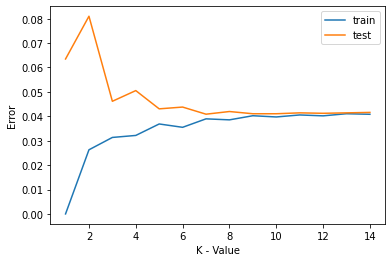

In [ ]:
error1=[]
error2=[]
for k in range(1,15):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  y_pred1 = knn.predict(x_train)
  error1.append(np.mean(y_train!=y_pred1))
  y_pred2 = knn.predict(x_test)
  error2.append(np.mean(y_test!=y_pred2))
plt.plot(range(1,15),error1,label='train')
plt.plot(range(1,15),error2,label='test')
plt.xlabel('K - Value')
plt.ylabel('Error')
plt.legend()

In [ ]:
knn=KNeighborsClassifier(n_neighbors=9,n_jobs=10)

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_jobs=10, n_neighbors=9)

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[   6,  223],
       [   2, 5251]])

In [ ]:
print("Classification Metrices : ")
print("Accuracy:",accuracy_score(y_test, y_pred))
knn_a = accuracy_score(y_test, y_pred)
print("F1 Score:",f1_score(y_test, y_pred, average='weighted'))
knn_f = f1_score(y_test, y_pred, average='weighted')
print("Precision: ",precision_score(y_test,y_pred, average='weighted'))
knn_p = precision_score(y_test,y_pred, average='weighted')
print("Recall: ",recall_score(y_test,y_pred,average = 'weighted'))
knn_r = recall_score(y_test,y_pred,average = 'weighted')

Classification Metrices : 
Accuracy: 0.9589565851878876
F1 Score: 0.9402431022095338
Precision:  0.9505204497610474
Recall:  0.9589565851878876


**Model 3 - Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lrmodel = LogisticRegression()

In [ ]:
lrmodel.fit(x_train,y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=lrmodel.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[  28,  201],
       [  10, 5243]])

In [ ]:
print("Classification Metrices : ")
print("Accuracy:",accuracy_score(y_test, y_pred))
lr_a = accuracy_score(y_test, y_pred)
print("F1 Score:",f1_score(y_test, y_pred, average='weighted'))
lr_f = f1_score(y_test, y_pred, average='weighted')
print("Precision: ",precision_score(y_test,y_pred, average='weighted'))
lr_p = precision_score(y_test,y_pred, average='weighted')
print("Recall: ",recall_score(y_test,y_pred,average = 'weighted'))
lr_r = recall_score(y_test,y_pred,average = 'weighted')

Classification Metrices : 
Accuracy: 0.9615103976650857
F1 Score: 0.9480871424663948
Precision:  0.9536280237031519
Recall:  0.9615103976650857


**MODEL 4 - SVM**

In [ ]:
from sklearn.svm import SVC
svmmodel = SVC()

In [ ]:
svmmodel.fit(X_train, y_train)

SVC()

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=svmmodel.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[   0,  229],
       [   0, 5253]])

In [ ]:
print("Classification Metrices : ")
print("Accuracy:",accuracy_score(y_test, y_pred))
svm_a = accuracy_score(y_test, y_pred)
print("F1 Score:",f1_score(y_test, y_pred, average='weighted'))
svm_f = f1_score(y_test, y_pred, average='weighted')
print("Precision: ",precision_score(y_test,y_pred, average='weighted'))
svm_p = precision_score(y_test,y_pred, average='weighted')
print("Recall: ",recall_score(y_test,y_pred,average = 'weighted'))
svm_r = recall_score(y_test,y_pred,average = 'weighted')

Classification Metrices : 
Accuracy: 0.9582269244801167
F1 Score: 0.9377859402504058
Precision:  0.9181988387986233
Recall:  0.9582269244801167


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



**Model 5 - MNNaive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nbmodel = MultinomialNB()

In [ ]:
nbmodel.fit(X_train,y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=nbmodel.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[   2,  227],
       [   0, 5253]])

In [ ]:
print("Classification Metrices : ")
print("Accuracy:",accuracy_score(y_test, y_pred))
nb_a = accuracy_score(y_test, y_pred)
print("F1 Score:",f1_score(y_test, y_pred, average='weighted'))
nb_f = f1_score(y_test, y_pred, average='weighted')
print("Precision: ",precision_score(y_test,y_pred, average='weighted'))
nb_p = precision_score(y_test,y_pred, average='weighted')
print("Recall: ",recall_score(y_test,y_pred,average = 'weighted'))
nb_r = recall_score(y_test,y_pred,average = 'weighted')

Classification Metrices : 
Accuracy: 0.9585917548340022
F1 Score: 0.9386840316981984
Precision:  0.9603070233837615
Recall:  0.9585917548340022


In [ ]:
print("Accuracy for logistic regression",lr_a)
print("Accuracy for knn",knn_a)
print("Accuracy for decision tree",dt_a)
print("Accuracy for SVM",svm_a)
print("Accuracy for MNNaive bayes",nb_a)

Accuracy for logistic regression 0.9615103976650857
Accuracy for knn 0.9589565851878876
Accuracy for decision tree 0.9410798978475009
Accuracy for SVM 0.9582269244801167
Accuracy for MNNaive bayes 0.9585917548340022


In [ ]:
print("F1 Score for logistic regression",lr_f)
print("F1 Score for knn",knn_f)
print("F1 Score for decision tree",dt_f)
print("F1 Score for SVM",svm_f)
print("F1 Score for MNNaive bayes",nb_f)

F1 Score for logistic regression 0.9480871424663948
F1 Score for knn 0.9402431022095338
F1 Score for decision tree 0.9378421934167039
F1 Score for SVM 0.9377859402504058
F1 Score for MNNaive bayes 0.9386840316981984


In [ ]:
print("Precision for logistic regression",lr_p)
print("Precision for knn",knn_p)
print("Precision for decision tree",dt_p)
print("Precision for SVM",svm_p)
print("Precision for MNNaive bayes",nb_p)

Precision for logistic regression 0.9536280237031519
Precision for knn 0.9505204497610474
Precision for decision tree 0.9348783661802943
Precision for SVM 0.9181988387986233
Precision for MNNaive bayes 0.9603070233837615


In [ ]:
print("Recall for logistic regression",lr_r)
print("Recall for knn",knn_r)
print("Recall for decision tree",dt_r)
print("Recall for SVM",svm_r)
print("Recall for MNNaive bayes",nb_r)

Recall for logistic regression 0.9615103976650857
Recall for knn 0.9589565851878876
Recall for decision tree 0.9410798978475009
Recall for SVM 0.9582269244801167
Recall for MNNaive bayes 0.9585917548340022


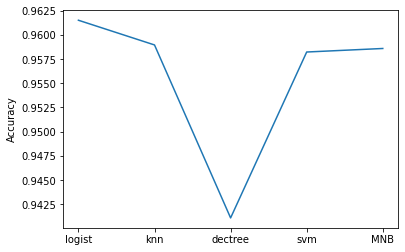

In [ ]:
import matplotlib.pyplot as plt
x =["logist","knn","dectree","svm","MNB"]
  
# Setting y values 
y =[lr_a,knn_a,dt_a,svm_a,nb_a]
  
# Adding label on the y-axis
plt.ylabel('Accuracy')
  
# plotting the graph
plt.plot(x, y)

**Analysis**

We have analyzed 5 machine learning models namely Logistic Regression, KNN, Decision Tree, SVM, MNNaive Bayes with the help of 4 classification metrices i.e accuracy, precision, recall , f1 score.

As our objective is to make a recommendation model we have chosen accuracy as our primary metrics to select the best model.

Amongst the five models that we analyzed logistic regression is having the  highest accuracy with an accuracy of 0.96151039766.
So we have selected logistic regression as our model.